# INTRODUCTION

Click-throught rate = # of clicks on ads/ # of views on ads

## Import libraries 

In [24]:
import numpy as np 
import pandas as pd 

In [25]:
ctr_data = pd.read_csv('avazu.csv')
print(ctr_data.shape)

(100000, 16)


## Data Exploration

Dataset of Avazu - [Data source](https://www.kaggle.com/competitions/avazu-ctr-prediction/data)
- id: ad identifier
- click: 0/1 for non-click/click
- hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
- C1 -- anonymized categorical variable
- banner_pos
- site_id
- site_domain
- site_category
- app_id
- app_domain
- app_category
- device_id
- device_ip
- device_model
- device_type
- device_conn_type
- C14-C21 -- anonymized categorical variables

Index(['id', 'click', 'hour', 'search_engine_type', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model',
       'device_type', 'device_conn_type', 'product_type', 'advertiser_type'],

In [26]:
ctr_data.head(5)

,Unnamed: 0,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,device_model_int
0,0,0,14102100,1005,0,1,2,15706,320,50,1722,0,35,-1,79,-4536565594672005814
1,1,0,14102100,1005,0,1,0,15704,320,50,1722,0,35,100084,79,-80052322344914806
2,2,0,14102100,1005,0,1,0,15704,320,50,1722,0,35,100084,79,-3130634972019121531
3,3,0,14102100,1005,0,1,0,15706,320,50,1722,0,35,100084,79,-8587292268327570678
4,4,0,14102100,1005,1,1,0,18993,320,50,2161,0,35,-1,157,-7699311560514132401


In [27]:
# drop 'Unamed: 0' column
ctr_data = ctr_data.drop(columns=['Unnamed: 0'])

In [28]:
print(ctr_data.columns)

Index(['click', 'hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type',
       'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'device_model_int'],
      dtype='object')


In [29]:
print(ctr_data.describe())

               click        hour             C1    banner_pos    device_type  \
count  100000.000000    100000.0  100000.000000  100000.00000  100000.000000   
mean        0.174900  14102100.0    1005.034410       0.19830       1.055730   
std         0.379883         0.0       1.088741       0.40264       0.583993   
min         0.000000  14102100.0    1001.000000       0.00000       0.000000   
25%         0.000000  14102100.0    1005.000000       0.00000       1.000000   
50%         0.000000  14102100.0    1005.000000       0.00000       1.000000   
75%         0.000000  14102100.0    1005.000000       0.00000       1.000000   
max         1.000000  14102100.0    1010.000000       5.00000       5.000000   

       device_conn_type            C14            C15            C16  \
count     100000.000000  100000.000000  100000.000000  100000.000000   
mean           0.199270   17682.145900     318.333960      56.818920   
std            0.635268    3237.735265      11.931939      36.9

In [30]:
#check null
print(ctr_data.isnull().sum())

click               0
hour                0
C1                  0
banner_pos          0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
device_model_int    0
dtype: int64


In [31]:
#check duplicate
print(ctr_data.duplicated().sum())

74057


In [32]:
# Check class balance
print(ctr_data['click'].value_counts())

click
0    82510
1    17490
Name: count, dtype: int64


In [33]:
print(ctr_data.dtypes)

click               int64
hour                int64
C1                  int64
banner_pos          int64
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
device_model_int    int64
dtype: object


In [34]:
# Distribution
ctr_data.groupby(['banner_pos', 'click']).size().unstack()

click,0,1
banner_pos,,
0,66650,13599
1,15831,3883
2,18,3
4,5,1
5,6,4


Dealing with dates

In [35]:
ctr_data.var()

click               1.443114e-01
hour                0.000000e+00
C1                  1.185358e+00
banner_pos          1.621187e-01
device_type         3.410476e-01
device_conn_type    4.035655e-01
C14                 1.048293e+07
C15                 1.423712e+02
C16                 1.363389e+03
C17                 1.559955e+05
C18                 1.497592e+00
C19                 5.957348e+04
C20                 2.356741e+09
C21                 2.068689e+03
device_model_int    2.967989e+37
dtype: float64

In [36]:
ctr_data.var().median()

142.37117443014432

In [37]:
#Scaling data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ctr_data)

In [38]:
print(scaled_data.shape)

(100000, 15)


In [39]:
# value count column 'click'
print(ctr_data['click'].value_counts())

click
0    82510
1    17490
Name: count, dtype: int64


In [40]:
# Train split test
from sklearn.model_selection import train_test_split
X = ctr_data.drop(columns=['click'])
y = ctr_data['click']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## CTR using Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X=X_train, y=y_train)


LogisticRegression()

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score 

# Accuracy metrics
pred_train_Y = logreg.predict(X_train)
pred_test_Y = logreg.predict(X_test)

train_accuracy = accuracy_score(y_train, pred_train_Y)
test_accuracy = accuracy_score(y_test, pred_test_Y)

print("Training accuracy:", round(train_accuracy,4))
print("Testing accuracy:", round(test_accuracy,4))

Training accuracy: 0.4996
Testing accuracy: 0.5057


In [44]:
train_precision = precision_score(y_train, pred_train_Y)
test_precision = precision_score(y_test, pred_test_Y)
print("Training precision:", round(train_precision,4))
print("Testing precision:", round(test_precision,4))

Training precision: 0.1802
Testing precision: 0.189


In [45]:
recall_score = recall_score(y_test, pred_test_Y)
print("Testing recall:", round(recall_score,4))


Testing recall: 0.5403


## CTR using Decision Trees

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dtc = DecisionTreeClassifier()

# Fit the model with data
dtc.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [47]:
# Import roc_curve and auc
from sklearn.metrics import roc_curve, auc

In [48]:
y_score = dtc.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

In [49]:
roc_auc = auc(fpr, tpr)

In [50]:
print("ROC AUC:", round(roc_auc,4))

ROC AUC: 0.6508


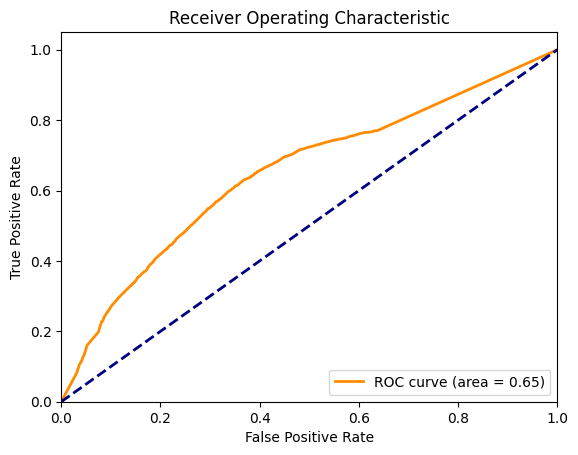

In [51]:
import matplotlib.pyplot as plt
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## CTR using MLP Deep Learning model

In [52]:
# Import MLPClassifier
from sklearn.neural_network import MLPClassifier

In [54]:
mlp = MLPClassifier()
print(mlp)

MLPClassifier()


In [55]:
# Fit the model with data
mlp.fit(X=X_train, y=y_train)

# Predict
pred_train_Y = mlp.predict(X_train)

In [56]:
# Accuracy metrics
train_accuracy = accuracy_score(y_train, pred_train_Y)
print("Training accuracy:", round(train_accuracy,4))

Training accuracy: 0.5004


In [57]:
pred_test_Y = mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, pred_test_Y)
print("Testing accuracy:", round(test_accuracy,4))

Testing accuracy: 0.4943
